In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,recall_score, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pickle

In [56]:
#import data
#import the 5 files
#parent_data, school_data, students_data, teachers_data, extracurricular_data
parent_data = pd.read_csv('data/parental_data.csv')
school_data = pd.read_csv('data/school_data.csv')
students_data = pd.read_csv('data/students_data.csv')
teachers_data = pd.read_csv('data/teachers_data.csv')
extracurr_data = pd.read_csv('data/extracurricular_activities_data.csv')

In [57]:
parent_data.head(2)

,parental_id,student_id,marital_status,educational_background,occupation,income_level,number_of_children
0,1,1,Divorced,Primary,Private Sector,Middle,3
1,2,2,Divorced,NaN,Private Sector,Middle,6


In [58]:
parent_data.isna().sum()

parental_id                 0
student_id                  0
marital_status              0
educational_background    130
occupation                  0
income_level                0
number_of_children          0
dtype: int64

In [59]:
#parent_data = parent_data.set_index("student_id")
#parent_data = parent_data.sort_index()

In [60]:
parent_data.head()

,parental_id,student_id,marital_status,educational_background,occupation,income_level,number_of_children
0,1,1,Divorced,Primary,Private Sector,Middle,3
1,2,2,Divorced,NaN,Private Sector,Middle,6
2,3,3,Widowed,Tertiary,Unemployed,Low,3
3,4,4,Single,NaN,Public Sector,High,6
4,5,5,Divorced,Tertiary,Public Sector,Middle,7


In [61]:
school_data.head(2)

,school_id,student_id,facilities_standard,student_percentage_pass
0,1,1,Advanced,77.7
1,2,2,Basic,70.6


In [62]:
teachers_data.head(2)

,teacher_id,student_id,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact
0,1,1,Doctorate,Low,High,84.0
1,2,2,Doctorate,High,Moderate,52.2


In [63]:
students_data.head(2)

,student_id,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance
0,1,Adunni,Ogunleye,Female,Ikosi,19.9,High,67.4
1,2,Nwankwo,Nwankwo,Female,Mile 12,9.1,High,50.0


In [64]:
extracurr_data.head(2)

,activity_id,activity_name,student_id,participation_level,achievement
0,1,Science Club,1,Moderate,National
1,2,Debate Team,2,High,Local


In [65]:
#the csv files have been imported, there are five csv files used in this project
#we are going to join the dataframes together

In [66]:
final_df = students_data.merge(school_data, on = 'student_id')

In [67]:
# Merge dataframes on the common column
final_df = students_data.merge(school_data, on="student_id", how = "outer") \
               .merge(extracurr_data, on="student_id",  how = "outer") \
               .merge(teachers_data, on="student_id", how = "outer") \
               .merge(parent_data, on="student_id", how = "outer")


In [68]:
final_df.head()

,student_id,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance,school_id,facilities_standard,...,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,parental_id,marital_status,educational_background,occupation,income_level,number_of_children
0,1,Adunni,Ogunleye,Female,Ikosi,19.9,High,67.4,1,Advanced,...,Doctorate,Low,High,84.0,1,Divorced,Primary,Private Sector,Middle,3
1,2,Nwankwo,Nwankwo,Female,Mile 12,9.1,High,50.0,2,Basic,...,Doctorate,High,Moderate,52.2,2,Divorced,NaN,Private Sector,Middle,6
2,3,Eze,Nwankwo,Male,Ketu,14.1,Low,57.8,3,Moderate,...,Bachelor's,Moderate,Low,60.0,3,Widowed,Tertiary,Unemployed,Low,3
3,4,Musa,Garba,Female,Ikosi,14.0,Low,62.3,4,Advanced,...,Bachelor's,High,High,86.8,4,Single,NaN,Public Sector,High,6
4,5,Bashir,Ibrahim,Female,Ketu,11.8,Low,51.1,5,Advanced,...,Master's,High,High,62.9,5,Divorced,Tertiary,Public Sector,Middle,7


In [69]:
final_df[final_df.duplicated]

,student_id,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance,school_id,facilities_standard,...,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,parental_id,marital_status,educational_background,occupation,income_level,number_of_children


In [70]:
final_df.isna().sum()

student_id                       0
name                             0
surname                          0
gender                           0
location                         0
study_hours                      0
parental_involvement_level       0
academic_performance             0
school_id                        0
facilities_standard              0
student_percentage_pass          0
activity_id                      0
activity_name                    0
participation_level              0
achievement                    118
teacher_id                       0
academic_level                   0
job_satisfaction                 0
salary_satisfaction              0
students_performance_impact      0
parental_id                      0
marital_status                   0
educational_background         130
occupation                       0
income_level                     0
number_of_children               0
dtype: int64

In [71]:
#some columns have None as their values but pandas converts None into NaN
final_df.achievement

0      National
1         Local
2           NaN
3      National
4      Regional
         ...   
495         NaN
496    Regional
497    National
498         NaN
499    Regional
Name: achievement, Length: 500, dtype: object

In [72]:
#we made the corrections here
final_df.fillna("None",inplace=True)

In [73]:
final_df.isna().sum()

student_id                     0
name                           0
surname                        0
gender                         0
location                       0
study_hours                    0
parental_involvement_level     0
academic_performance           0
school_id                      0
facilities_standard            0
student_percentage_pass        0
activity_id                    0
activity_name                  0
participation_level            0
achievement                    0
teacher_id                     0
academic_level                 0
job_satisfaction               0
salary_satisfaction            0
students_performance_impact    0
parental_id                    0
marital_status                 0
educational_background         0
occupation                     0
income_level                   0
number_of_children             0
dtype: int64

In [74]:
final_df.head(1)

,student_id,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance,school_id,facilities_standard,...,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,parental_id,marital_status,educational_background,occupation,income_level,number_of_children
0,1,Adunni,Ogunleye,Female,Ikosi,19.9,High,67.4,1,Advanced,...,Doctorate,Low,High,84.0,1,Divorced,Primary,Private Sector,Middle,3


In [75]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   500 non-null    int64  
 1   name                         500 non-null    object 
 2   surname                      500 non-null    object 
 3   gender                       500 non-null    object 
 4   location                     500 non-null    object 
 5   study_hours                  500 non-null    float64
 6   parental_involvement_level   500 non-null    object 
 7   academic_performance         500 non-null    float64
 8   school_id                    500 non-null    int64  
 9   facilities_standard          500 non-null    object 
 10  student_percentage_pass      500 non-null    float64
 11  activity_id                  500 non-null    int64  
 12  activity_name                500 non-null    object 
 13  participation_level 

In [76]:
#we are going to drop the columns with ID because they will not be needed in model development

In [77]:
final_df.drop(['activity_id','student_id','parental_id','teacher_id','school_id'],axis = 1,
              inplace=True)

In [78]:
final_df.head(1)

,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance,facilities_standard,student_percentage_pass,activity_name,...,achievement,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,marital_status,educational_background,occupation,income_level,number_of_children
0,Adunni,Ogunleye,Female,Ikosi,19.9,High,67.4,Advanced,77.7,Science Club,...,National,Doctorate,Low,High,84.0,Divorced,Primary,Private Sector,Middle,3


In [79]:
final_df.describe()

,study_hours,academic_performance,student_percentage_pass,students_performance_impact,number_of_children
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,12.432600,54.852400,56.727200,74.487000,4.110000
std,4.458609,9.542333,12.889132,14.754902,2.045059
min,5.000000,35.600000,35.000000,50.100000,1.000000
25%,8.500000,46.875000,44.975000,61.675000,2.000000
50%,12.200000,54.450000,56.400000,73.850000,4.000000
75%,16.400000,62.425000,68.200000,87.000000,6.000000
max,20.000000,74.600000,79.700000,100.000000,7.000000


In [80]:
final_df.columns

Index(['name', 'surname', 'gender', 'location', 'study_hours',
       'parental_involvement_level', 'academic_performance',
       'facilities_standard', 'student_percentage_pass', 'activity_name',
       'participation_level', 'achievement', 'academic_level',
       'job_satisfaction', 'salary_satisfaction',
       'students_performance_impact', 'marital_status',
       'educational_background', 'occupation', 'income_level',
       'number_of_children'],
      dtype='object')

In [81]:
df = final_df.copy()

In [82]:
#we are going to create a Target variable, for this variable, students that scored below 45 failed and above passed
df['Target'] = df['academic_performance'].apply(lambda x: 'Failed' if x < 45 else 'Passed')


In [83]:
df.head(1)

,name,surname,gender,location,study_hours,parental_involvement_level,academic_performance,facilities_standard,student_percentage_pass,activity_name,...,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,marital_status,educational_background,occupation,income_level,number_of_children,Target
0,Adunni,Ogunleye,Female,Ikosi,19.9,High,67.4,Advanced,77.7,Science Club,...,Doctorate,Low,High,84.0,Divorced,Primary,Private Sector,Middle,3,Passed


In [84]:
df.Target.value_counts()

Target
Passed    411
Failed     89
Name: count, dtype: int64

<Axes: xlabel='Target'>

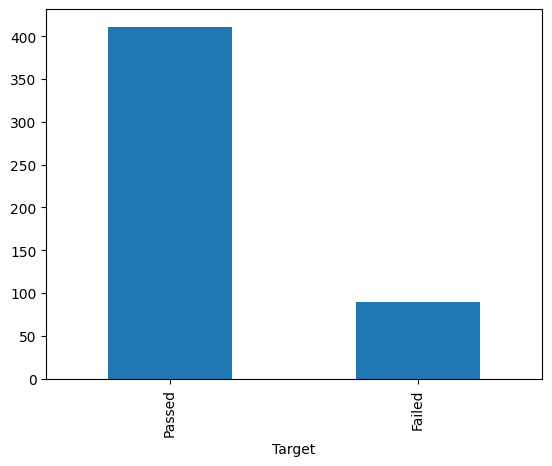

In [85]:
df.Target.value_counts().plot.bar()

In [86]:
#more students passed the exams

<Axes: xlabel='gender'>

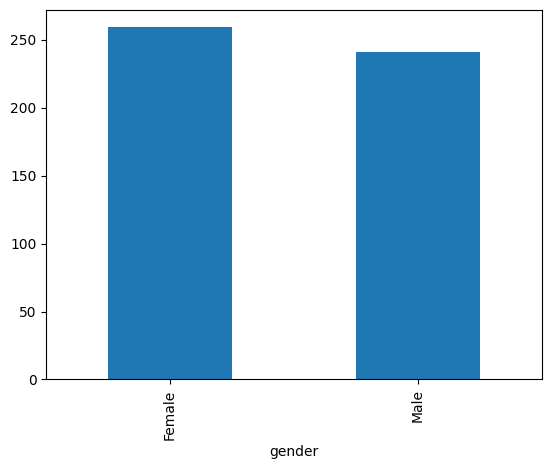

In [87]:
df.gender.value_counts().plot.bar()

In [88]:
#there are more female students in the data

In [89]:
#we are going to drop the name columns too

df.drop(['name','surname'],
        axis = 1,
        inplace=True)

In [90]:
df.head(1)

,gender,location,study_hours,parental_involvement_level,academic_performance,facilities_standard,student_percentage_pass,activity_name,participation_level,achievement,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,marital_status,educational_background,occupation,income_level,number_of_children,Target
0,Female,Ikosi,19.9,High,67.4,Advanced,77.7,Science Club,Moderate,National,Doctorate,Low,High,84.0,Divorced,Primary,Private Sector,Middle,3,Passed


In [91]:
#the student location too is aother column to keep an eye on
df.drop('location',axis = 1,inplace=True)

In [92]:
#replace the target variable with 1s and 0s

In [93]:
df.Target.replace({'Passed':1,
                   'Failed':0},
                   inplace = True)

C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_19776\2164012965.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Target.replace({'Passed':1,
C:\Users\OLU-JUNAID & CO\AppData\Local\Temp\ipykernel_19776\2164012965.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Target.replace({'Pas

In [94]:
df.head()

,gender,study_hours,parental_involvement_level,academic_performance,facilities_standard,student_percentage_pass,activity_name,participation_level,achievement,academic_level,job_satisfaction,salary_satisfaction,students_performance_impact,marital_status,educational_background,occupation,income_level,number_of_children,Target
0,Female,19.9,High,67.4,Advanced,77.7,Science Club,Moderate,National,Doctorate,Low,High,84.0,Divorced,Primary,Private Sector,Middle,3,1
1,Female,9.1,High,50.0,Basic,70.6,Debate Team,High,Local,Doctorate,High,Moderate,52.2,Divorced,None,Private Sector,Middle,6,1
2,Male,14.1,Low,57.8,Moderate,50.8,Debate Team,High,None,Bachelor's,Moderate,Low,60.0,Widowed,Tertiary,Unemployed,Low,3,1
3,Female,14.0,Low,62.3,Advanced,70.5,Football,High,National,Bachelor's,High,High,86.8,Single,None,Public Sector,High,6,1
4,Female,11.8,Low,51.1,Advanced,72.3,Music Band,Moderate,Regional,Master's,High,High,62.9,Divorced,Tertiary,Public Sector,Middle,7,1


In [95]:
df.activity_name.value_counts()

activity_name
Debate Team     109
Drama Club      104
Music Band       99
Science Club     96
Football         92
Name: count, dtype: int64

In [96]:
#separating the categorical and numerical columns
num_cols = []
cat_cols = []

for c in df.columns:
    if df[c].dtype == 'object':
        cat_cols.append(c)
    else:
        num_cols.append(c)

In [97]:
num_cols.remove('Target')

In [98]:
cat_cols

['gender',
 'parental_involvement_level',
 'facilities_standard',
 'activity_name',
 'participation_level',
 'achievement',
 'academic_level',
 'job_satisfaction',
 'salary_satisfaction',
 'marital_status',
 'educational_background',
 'occupation',
 'income_level']

In [99]:
#split the data into x and y
X = df.drop('Target',
            axis = 1)
y = df.Target

In [100]:
#we are going to encode the categorical features 

In [101]:
encoder = OneHotEncoder(drop = 'first')
x_encoded = encoder.fit_transform(X[cat_cols]).toarray()
x_encoded = pd.DataFrame(x_encoded,columns=encoder.get_feature_names_out(cat_cols))
x_encoded.head(1)

,gender_Male,parental_involvement_level_Low,parental_involvement_level_Moderate,facilities_standard_Basic,facilities_standard_Moderate,activity_name_Drama Club,activity_name_Football,activity_name_Music Band,activity_name_Science Club,participation_level_Low,...,marital_status_Single,marital_status_Widowed,educational_background_Primary,educational_background_Secondary,educational_background_Tertiary,occupation_Public Sector,occupation_Self-Employed,occupation_Unemployed,income_level_Low,income_level_Middle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [102]:
pickle.dump(encoder,open('encoder.pkl','wb'))

In [103]:
#scaling numerical values to have it in the same range
#we are going to use standard scaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X[num_cols])
x_scaled = pd.DataFrame(x_scaled, columns= num_cols)
x_scaled.head(1)

,study_hours,academic_performance,student_percentage_pass,students_performance_impact,number_of_children
0,1.676505,1.316257,1.628799,0.645381,-0.543315


In [104]:
pickle.dump(scaler,open('scaler.pkl','wb'))

In [105]:
#combining the scaled numerical features and the encoded categorical features
X = pd.concat([x_scaled,x_encoded],axis=1)
X.head(1)

,study_hours,academic_performance,student_percentage_pass,students_performance_impact,number_of_children,gender_Male,parental_involvement_level_Low,parental_involvement_level_Moderate,facilities_standard_Basic,facilities_standard_Moderate,...,marital_status_Single,marital_status_Widowed,educational_background_Primary,educational_background_Secondary,educational_background_Tertiary,occupation_Public Sector,occupation_Self-Employed,occupation_Unemployed,income_level_Low,income_level_Middle
0,1.676505,1.316257,1.628799,0.645381,-0.543315,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [106]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_train,y_train)

1.0

In [108]:
model.score(x_test,y_test)

1.0

##### The model has a high accuracy score

In [109]:
pickle.dump(model,open('model.pkl','wb'))

In [110]:
#making predictions
y_pred = model.predict(x_test)

##### Evaluation of the model

In [111]:
#confusion matrix
confusion_matrix(y_test,y_pred)

array([[19,  0],
       [ 0, 81]])

In [112]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        81

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [113]:
#the model has a high precision and recall which means it is adept at predicting both classes

In [114]:
#cross validation 
cv_scores = cross_val_score(model,X,y,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [0.99 1.   0.99 1.   0.99]
Mean score is  0.994


In [387]:
### it can be deduced that the model generalises well

In [115]:
#we are going to try out another model to get a second opinion on the model performance

In [116]:
model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [117]:
model2.score(x_train,y_train)

1.0

In [118]:
model2.score(x_test,y_test)

1.0

In [391]:
#the two models used in this project have a high accuracy, precision, recall

In [119]:
#cross val score
cv_scores = cross_val_score(model2,X,y,cv = 5)

print('Scores are ',cv_scores)
print("Mean score is ", cv_scores.mean())

Scores are  [1. 1. 1. 1. 1.]
Mean score is  1.0


In [120]:
## evaluation of the model performance
#precison,recall etc

In [408]:
model.feature_importances_

array([0.30055608, 0.50685187, 0.02356664, 0.02928803, 0.00924295,
       0.00445062, 0.00303604, 0.00502646, 0.00375074, 0.00317367,
       0.00259501, 0.00407234, 0.00385752, 0.00265963, 0.00388067,
       0.00317831, 0.00410693, 0.0039048 , 0.00231908, 0.00425568,
       0.0022822 , 0.00460801, 0.00403162, 0.00508393, 0.00359696,
       0.01085012, 0.00531027, 0.00363196, 0.00339617, 0.00363462,
       0.0043962 , 0.00401629, 0.00728387, 0.00300509, 0.00683023,
       0.00426938])

In [409]:
#the study_hours and students_score columns are the most important features